In [1]:
cd variation_paper_cluster_outputs_1111

/Users/davidsiegel/Documents/UTR_Olivier/variation_paper_cluster_outputs_1111


In [2]:
import pandas as pd
import numpy as np
import glob
import os
import sys
import scipy.stats as st
import math
import random
import matplotlib.pyplot as plt
plt.rcParams.update({'errorbar.capsize': 5})
%matplotlib inline
import time
import itertools
import scipy
from scipy.optimize import minimize,minimize_scalar
from scipy.stats import nbinom, poisson
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib import cm

import re
from os.path import getsize

import readline

import seaborn as sns
sns.set()

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

# Null Simulations

In [3]:
nullresult_df = pd.read_csv('simulation1_1.txt',index_col=False)
for file_number in range(2,501):
    nullresult_df = pd.concat([nullresult_df,pd.read_csv('simulation1_'+str(file_number)+'.txt',index_col=False)])

## Fig 2A

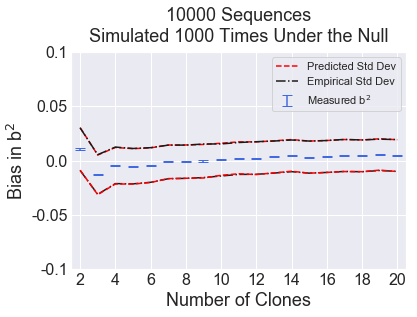

In [4]:
skip_freq=1

fig,ax = plt.subplots()

boxplot_b2_null = []
std_est_list_null = []
true_std_list_null = []
stderr_list_null = []
mean_list_null = []
for num_clones in sorted(set(nullresult_df.Num_clones)):
    boxplot_b2_null.append(np.array(nullresult_df.Fig2A_b2_mean[nullresult_df.Num_clones==num_clones]))
    std_est_list_null.append(np.sqrt(np.mean(nullresult_df.Fig2A_b2_var[nullresult_df.Num_clones==num_clones])))
    true_std_list_null.append(np.std(np.array(nullresult_df.Fig2A_b2_mean[nullresult_df.Num_clones==num_clones])))
    stderr_list_null.append(st.sem(nullresult_df.Fig2A_b2_mean[nullresult_df.Num_clones==num_clones]))
    mean_list_null.append(np.mean(nullresult_df.Fig2A_b2_mean[nullresult_df.Num_clones==num_clones]))
    
plt.errorbar(range(2,21),mean_list_null,yerr=stderr_list_null,fmt = 'none',ecolor='royalblue',label='Measured b$^2$')

plt.plot(range(2,21),np.array(mean_list_null)+np.array(std_est_list_null),color="red",linestyle='--',alpha=1,label='Predicted Std Dev')
plt.plot(range(2,21),np.array(mean_list_null)-np.array(std_est_list_null),'k-.',alpha=1)
plt.plot(range(2,21),np.array(mean_list_null)-np.array(true_std_list_null),color="red",linestyle='--',alpha=1)
plt.plot(range(2,21),np.array(mean_list_null)+np.array(true_std_list_null),'k-.',alpha=1,label='Empirical Std Dev')

ax.set_xticks(np.array(sorted(set(nullresult_df.Num_clones)))[::2])
ax.set_xticklabels(np.array(sorted(set(nullresult_df.Num_clones)))[::2],fontsize=16)

ax.set_yticks([-.1,-.05,0,.05,.1])
ax.set_yticklabels([-0.10,-0.05,0.00,0.05,0.10],fontsize=16)


ax.tick_params(direction='in')
plt.xlabel("Number of Clones",fontsize=18)
plt.ylabel("Bias in b$^2$",fontsize=18)
plt.title('10000 Sequences\nSimulated 1000 Times Under the Null',fontsize=18,pad=10)
plt.xlim(1.5,20.5)
plt.ylim(-.1,.1)

plt.legend()

plt.show()



## Fig 3D

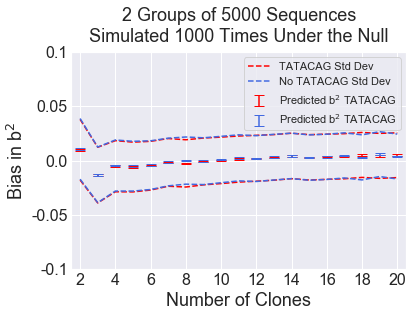

In [5]:
boxplot_b2_TATACAG_null = []
boxplot_b2_noTATACAG_null = []
std_est_list_TATACAG_null = []
std_est_list_noTATACAG_null = []
true_std_list_TATACAG_null = []
true_std_list_noTATACAG_null = []
stderr_list_TATACAG_null = []
stderr_list_noTATACAG_null = []
mean_list_TATACAG_null = []
mean_list_noTATACAG_null = []

for num_clones in sorted(set(nullresult_df.Num_clones)):
    boxplot_b2_TATACAG_null.append(np.array(nullresult_df.Fig3D_h21[nullresult_df.Num_clones==num_clones]))
    boxplot_b2_noTATACAG_null.append(np.array(nullresult_df.Fig3D_h22[nullresult_df.Num_clones==num_clones]))
    std_est_list_TATACAG_null.append(np.sqrt(np.mean(nullresult_df.Fig3D_dh21[nullresult_df.Num_clones==num_clones])))
    std_est_list_noTATACAG_null.append(np.sqrt(np.mean(nullresult_df.Fig3D_dh22[nullresult_df.Num_clones==num_clones])))

    true_std_list_TATACAG_null.append(np.std(np.array(nullresult_df.Fig3D_h21[nullresult_df.Num_clones==num_clones])))
    true_std_list_noTATACAG_null.append(np.std(np.array(nullresult_df.Fig3D_h22[nullresult_df.Num_clones==num_clones])))
    stderr_list_TATACAG_null.append(st.sem(nullresult_df.Fig3D_h21[nullresult_df.Num_clones==num_clones]))
    stderr_list_noTATACAG_null.append(st.sem(nullresult_df.Fig3D_h22[nullresult_df.Num_clones==num_clones]))
    mean_list_TATACAG_null.append(np.mean(nullresult_df.Fig3D_h21[nullresult_df.Num_clones==num_clones]))
    mean_list_noTATACAG_null.append(np.mean(nullresult_df.Fig3D_h22[nullresult_df.Num_clones==num_clones]))
    


fig,ax = plt.subplots()

ax.set_xticks(np.array(sorted(set(nullresult_df.Num_clones)))[::skip_freq])
ax.set_xticklabels(np.array(sorted(set(nullresult_df.Num_clones)))[::skip_freq])
plt.xlabel("Number of Clones")
plt.ylabel("Bias in b$^2$")
plt.title('2 Groups of 5000 Sequences Simulated 1000 Times Under the Null')
plt.xlim(1.5,20.5)


plt.errorbar(range(2,21),mean_list_TATACAG_null,yerr=stderr_list_TATACAG_null,fmt = 'none',ecolor="red",label='Predicted b$^2$ TATACAG')
plt.errorbar(range(2,21),mean_list_noTATACAG_null,yerr=stderr_list_noTATACAG_null,fmt = 'none',ecolor='royalblue',label='Predicted b$^2$ TATACAG')

plt.plot(range(2,21),np.array(mean_list_TATACAG_null)+np.array(std_est_list_TATACAG_null),color="red",linestyle='--',alpha=1,label='TATACAG Std Dev')
plt.plot(range(2,21),np.array(mean_list_TATACAG_null)-np.array(std_est_list_TATACAG_null),color="red",linestyle='--',alpha=1)
plt.plot(range(2,21),np.array(mean_list_noTATACAG_null)+np.array(std_est_list_noTATACAG_null),color='royalblue',linestyle='--',alpha=1,label='No TATACAG Std Dev')
plt.plot(range(2,21),np.array(mean_list_noTATACAG_null)-np.array(std_est_list_noTATACAG_null),color='royalblue',linestyle='--',alpha=1)

ax.set_xticks(np.array(sorted(set(nullresult_df.Num_clones)))[::2])
ax.set_xticklabels(np.array(sorted(set(nullresult_df.Num_clones)))[::2],fontsize=16)
ax.set_yticks([-.1,-.05,0,.05,.1])
ax.set_yticklabels([-0.10,-0.05,0.00,0.05,0.10],fontsize=16)
ax.tick_params(direction='in')
plt.xlabel("Number of Clones",fontsize=18)
plt.ylabel("Bias in b$^2$",fontsize=18)
plt.title('2 Groups of 5000 Sequences\nSimulated 1000 Times Under the Null',fontsize=18,pad=10)
plt.xlim(1.5,20.5)
plt.ylim(-.1,.1)

plt.legend()

plt.show()

## Fig 3A

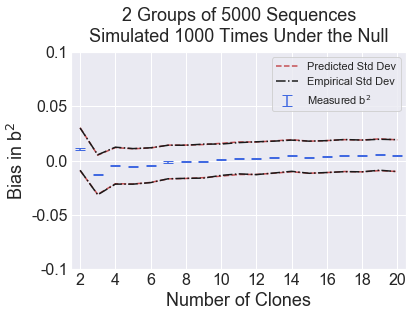

In [6]:
boxplot_b2_null = []
std_est_list_null = []
std_true_list_null = []
stderr_list_null = []
mean_list_null = []
for num_clones in sorted(set(nullresult_df.Num_clones)):
    boxplot_b2_null.append(np.array(nullresult_df.Fig3A_h2[nullresult_df.Num_clones==num_clones]))
    std_est_list_null.append(np.sqrt(np.mean(nullresult_df.Fig3A_dh2[nullresult_df.Num_clones==num_clones])))
    std_true_list_null.append(np.std(nullresult_df.Fig3A_h2[nullresult_df.Num_clones==num_clones]))
    stderr_list_null.append(st.sem(nullresult_df.Fig3A_h2[nullresult_df.Num_clones==num_clones]))
    mean_list_null.append(np.mean(nullresult_df.Fig3A_h2[nullresult_df.Num_clones==num_clones]))
    


fig,ax = plt.subplots()

plt.errorbar(range(2,21),mean_list_null,yerr=stderr_list_null,fmt = 'none',ecolor='royalblue',label='Measured b$^2$')

plt.plot(range(2,21),np.array(mean_list_null)+np.array(std_est_list_null),'r--',alpha=1,label='Predicted Std Dev')
plt.plot(range(2,21),np.array(mean_list_null)-np.array(std_est_list_null),'r--',alpha=1)
plt.plot(range(2,21),np.array(mean_list_null)+np.array(std_true_list_null),'k-.',alpha=1,label='Empirical Std Dev')
plt.plot(range(2,21),np.array(mean_list_null)-np.array(std_true_list_null),'k-.',alpha=1)

ax.set_xticks(np.array(sorted(set(nullresult_df.Num_clones)))[::2])
ax.set_xticklabels(np.array(sorted(set(nullresult_df.Num_clones)))[::2],fontsize=16)
ax.set_yticks([-.1,-.05,0,.05,.1])
ax.set_yticklabels([-0.10,-0.05,0.00,0.05,0.10],fontsize=16)
ax.tick_params(direction='in')
plt.xlabel("Number of Clones",fontsize=18)
plt.ylabel("Bias in b$^2$",fontsize=18)
plt.title('2 Groups of 5000 Sequences\nSimulated 1000 Times Under the Null', fontsize=18,pad=10)
plt.xlim(1.5,20.5)
plt.ylim(-.1,.1)

plt.legend()

plt.show()

## Fig 4A

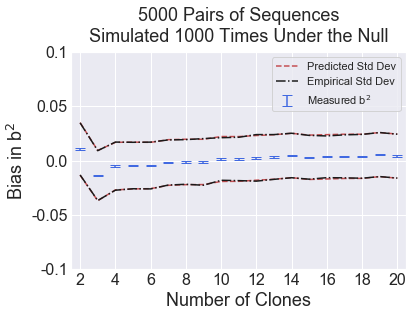

In [7]:
fig,ax = plt.subplots()

boxplot_b2_null = []
std_est_list_null = []
std_true_list_null = []
stderr_list_null = []
mean_list_null = []
for num_clones in sorted(set(nullresult_df.Num_clones)):
    boxplot_b2_null.append(np.array(nullresult_df.Fig4A_h2[nullresult_df.Num_clones==num_clones]))
    std_est_list_null.append(np.sqrt(np.mean(nullresult_df.Fig4A_dh2[nullresult_df.Num_clones==num_clones])))
    std_true_list_null.append(np.std(nullresult_df.Fig4A_h2[nullresult_df.Num_clones==num_clones]))
    stderr_list_null.append(st.sem(nullresult_df.Fig4A_h2[nullresult_df.Num_clones==num_clones]))
    mean_list_null.append(np.mean(nullresult_df.Fig4A_h2[nullresult_df.Num_clones==num_clones]))
    

plt.errorbar(range(2,21),mean_list_null,yerr=stderr_list_null,fmt = 'none',ecolor='royalblue',label='Measured b$^2$')

plt.plot(range(2,21),np.array(mean_list_null)+np.array(std_est_list_null),'r--',alpha=1,label='Predicted Std Dev')
plt.plot(range(2,21),np.array(mean_list_null)-np.array(std_est_list_null),'r--',alpha=1)
plt.plot(range(2,21),np.array(mean_list_null)+np.array(std_true_list_null),'k-.',alpha=1,label='Empirical Std Dev')
plt.plot(range(2,21),np.array(mean_list_null)-np.array(std_true_list_null),'k-.',alpha=1)

ax.set_xticks(np.array(sorted(set(nullresult_df.Num_clones)))[::2])
ax.set_xticklabels(np.array(sorted(set(nullresult_df.Num_clones)))[::2],fontsize=16)
ax.set_yticks([-.1,-.05,0,.05,.1])
ax.set_yticklabels([-0.10,-0.05,0.00,0.05,0.10],fontsize=16)
ax.tick_params(direction='in')
plt.xlabel("Number of Clones",fontsize=18)
plt.ylabel("Bias in b$^2$",fontsize=18)
plt.title('5000 Pairs of Sequences\nSimulated 1000 Times Under the Null',fontsize=18,pad=10)
plt.xlim(1.5,20.5)
plt.ylim(-.1,.1)

plt.legend()

plt.show()

# Alt Simulations

In [8]:
nullresult_df = pd.read_csv('simulation2_1.txt',index_col=False)
for file_number in range(2,501):
    nullresult_df = pd.concat([nullresult_df,pd.read_csv('simulation2_'+str(file_number)+'.txt',index_col=False)])

# Not actually null but it's what I called the variable,
# it's the simulation with low noise and infinite counts under the alt

In [9]:
altresult_df = pd.read_csv('simulation3_1.txt',index_col=False)
for file_number in range(2,501):
    altresult_df = pd.concat([altresult_df,pd.read_csv('simulation3_'+str(file_number)+'.txt',index_col=False)])

## Fig 2B and 2C

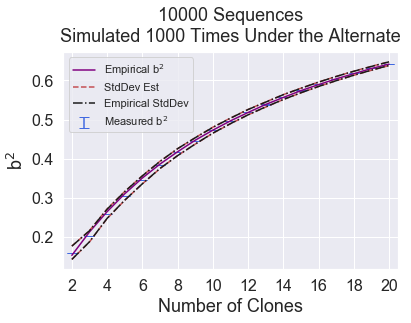

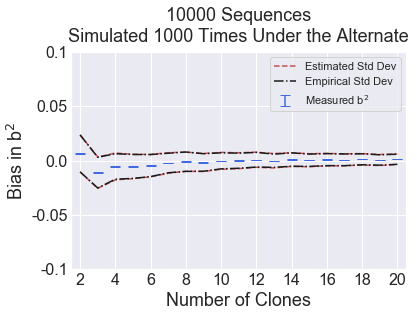

In [10]:
fig,ax = plt.subplots()


boxplot_b2_alt = []
std_est_list_alt = []
true_std_list_alt = []
stderr_list_alt = []
mean_list_alt = []
for num_clones in sorted(set(nullresult_df.Num_clones)):
    boxplot_b2_alt.append(np.array(altresult_df.Fig2_b2_mean[altresult_df.Num_clones==num_clones]))
    std_est_list_alt.append(np.sqrt(np.mean(altresult_df.Fig2_b2_var[altresult_df.Num_clones==num_clones])))
    true_std_list_alt.append(np.std(np.array(altresult_df.Fig2_b2_mean[altresult_df.Num_clones==num_clones])))
    stderr_list_alt.append(st.sem(altresult_df.Fig2_b2_mean[nullresult_df.Num_clones==num_clones]))
    mean_list_alt.append(np.mean(altresult_df.Fig2_b2_mean[nullresult_df.Num_clones==num_clones]))
    
    
    
boxplot_var_alt = []
boxplot_var_null = []
boxplot_var_var_alt = []
boxplot_var_var_null = []
for num_clones in sorted(set(altresult_df.Num_clones)):
    boxplot_var_alt.append(np.array(altresult_df.Fig2_var_RD[altresult_df.Num_clones==num_clones]))
    boxplot_var_null.append(np.array(nullresult_df.Fig2_var_RD[nullresult_df.Num_clones==num_clones]))
    boxplot_var_var_alt.append(np.array(altresult_df.Fig2_var_var_RD[altresult_df.Num_clones==num_clones]))
    boxplot_var_var_null.append(np.array(nullresult_df.Fig2_var_var_RD[nullresult_df.Num_clones==num_clones]))

for i in range(len(boxplot_var_alt)):
    boxplot_var_alt[i] = np.mean(boxplot_var_alt[i])
    boxplot_var_null[i] = np.mean(boxplot_var_null[i])
    boxplot_var_var_alt[i] = np.mean(boxplot_var_var_alt[i])
    boxplot_var_var_null[i] = np.mean(boxplot_var_var_null[i])
boxplot_var_alt = np.array(boxplot_var_alt)
boxplot_var_null = np.array(boxplot_var_null)
boxplot_var_var_alt = np.array(boxplot_var_var_alt)
boxplot_var_var_null = np.array(boxplot_var_var_null)

def uncertainty(a,b,da,db):
    return a/b,np.sqrt((b*da)**2+(a*db)**2/b**4)

h2,dh2 = uncertainty(boxplot_var_null,boxplot_var_alt,np.sqrt(boxplot_var_var_null),np.sqrt(boxplot_var_var_alt))

plt.errorbar(range(2,21),mean_list_alt,yerr=stderr_list_alt,fmt = 'none',ecolor='royalblue',label='Measured b$^2$')




plt.plot(range(2,21),h2,'purple',alpha=1,label='Empirical b$^2$')

mean_b2_alt = []
for i in range(len(boxplot_b2_alt)):
    mean_b2_alt.append(np.mean(boxplot_b2_alt[i]))
    
plt.plot(range(2,21),np.array(mean_b2_alt)+np.array(std_est_list_alt),'r--',alpha=1,label='StdDev Est')
plt.plot(range(2,21),np.array(mean_b2_alt)-np.array(std_est_list_alt),'r--',alpha=1)

plt.plot(range(2,21),np.array(mean_b2_alt)+np.array(true_std_list_alt),'k-.',alpha=1,label='Empirical StdDev')
plt.plot(range(2,21),np.array(mean_b2_alt)-np.array(true_std_list_alt),'k-.',alpha=1)
    
plt.legend()

ax.set_xticks(np.array(sorted(set(altresult_df.Num_clones)))[::2])
ax.set_xticklabels(np.array(sorted(set(altresult_df.Num_clones)))[::2],fontsize=16)
ax.set_yticks([.2,.3,.4,.5,.6])
ax.set_yticklabels([.2,.3,.4,.5,.6],fontsize=16)
plt.xlabel("Number of Clones",fontsize=18)
plt.ylabel("b$^2$",fontsize=18)
plt.title('10000 Sequences\nSimulated 1000 Times Under the Alternate',fontsize=18,pad=10)
plt.xlim(1.5,20.5)

plt.show()



fig,ax = plt.subplots()


boxplot_b2_alt = []
std_est_list_alt = []
true_std_list_alt = []
stderr_list_alt = []
mean_list_alt = []
for num_clones in sorted(set(nullresult_df.Num_clones)):
    boxplot_b2_alt.append(np.array(altresult_df.Fig2_b2_mean[altresult_df.Num_clones==num_clones]))
    std_est_list_alt.append(np.sqrt(np.mean(altresult_df.Fig2_b2_var[altresult_df.Num_clones==num_clones])))
    true_std_list_alt.append(np.std(np.array(altresult_df.Fig2_b2_mean[altresult_df.Num_clones==num_clones])))
    stderr_list_alt.append(st.sem(altresult_df.Fig2_b2_mean[nullresult_df.Num_clones==num_clones]))
    mean_list_alt.append(np.mean(altresult_df.Fig2_b2_mean[nullresult_df.Num_clones==num_clones]))
    
    
    
boxplot_var_alt = []
boxplot_var_null = []
boxplot_var_var_alt = []
boxplot_var_var_null = []
for num_clones in sorted(set(altresult_df.Num_clones)):
    boxplot_var_alt.append(np.array(altresult_df.Fig2_var_RD[altresult_df.Num_clones==num_clones]))
    boxplot_var_null.append(np.array(nullresult_df.Fig2_var_RD[nullresult_df.Num_clones==num_clones]))
    boxplot_var_var_alt.append(np.array(altresult_df.Fig2_var_var_RD[altresult_df.Num_clones==num_clones]))
    boxplot_var_var_null.append(np.array(nullresult_df.Fig2_var_var_RD[nullresult_df.Num_clones==num_clones]))

for i in range(len(boxplot_var_alt)):
    boxplot_var_alt[i] = np.mean(boxplot_var_alt[i])
    boxplot_var_null[i] = np.mean(boxplot_var_null[i])
    boxplot_var_var_alt[i] = np.mean(boxplot_var_var_alt[i])
    boxplot_var_var_null[i] = np.mean(boxplot_var_var_null[i])
boxplot_var_alt = np.array(boxplot_var_alt)
boxplot_var_null = np.array(boxplot_var_null)
boxplot_var_var_alt = np.array(boxplot_var_var_alt)
boxplot_var_var_null = np.array(boxplot_var_var_null)

def uncertainty(a,b,da,db):
    return a/b,np.sqrt((b*da)**2+(a*db)**2/b**4)

h2,dh2 = uncertainty(boxplot_var_null,boxplot_var_alt,np.sqrt(boxplot_var_var_null),np.sqrt(boxplot_var_var_alt))

for i in range(len(boxplot_b2_alt)):
    boxplot_b2_alt[i]-=h2[i]

plt.errorbar(range(2,21),np.array(mean_list_alt)-np.array(h2),yerr=stderr_list_alt,fmt = 'none',ecolor='royalblue',label='Measured b$^2$')


mean_b2_alt = []
median_b2_alt = []
for i in range(len(boxplot_b2_alt)):
    mean_b2_alt.append(np.mean(boxplot_b2_alt[i]))
    median_b2_alt.append(np.median(boxplot_b2_alt[i]))
    
plt.plot(range(2,21),np.array(mean_b2_alt)+np.array(std_est_list_alt),'r--',alpha=1,label='Estimated Std Dev')
plt.plot(range(2,21),np.array(mean_b2_alt)-np.array(std_est_list_alt),'r--',alpha=1)

plt.plot(range(2,21),np.array(mean_b2_alt)+np.array(true_std_list_alt),'k-.',alpha=1,label='Empirical Std Dev')
plt.plot(range(2,21),np.array(mean_b2_alt)-np.array(true_std_list_alt),'k-.',alpha=1)
    
plt.legend()
ax.tick_params(direction='in')
ax.set_xticks(np.array(sorted(set(altresult_df.Num_clones)))[::2])
ax.set_xticklabels(np.array(sorted(set(altresult_df.Num_clones)))[::2],fontsize=16)
ax.set_yticks([-.1,-.05,0,.05,.1])
ax.set_yticklabels([-0.10,-0.05,0.00,0.05,0.10],fontsize=16)
plt.xlabel("Number of Clones",fontsize=18)
plt.ylabel("Bias in b$^2$",fontsize=18)
plt.title('10000 Sequences\nSimulated 1000 Times Under the Alternate',fontsize=18,pad=10)
plt.xlim(1.5,20.5)
plt.ylim(-.1,.1)

plt.show()



## Fig 3E

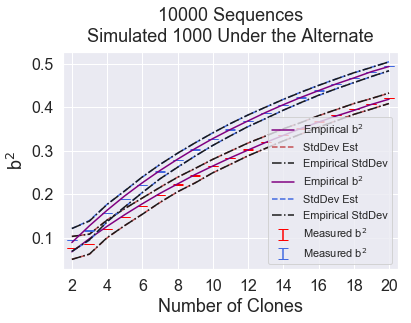

In [11]:
skip_freq=1


fig,ax = plt.subplots()


boxplot_b2_alt = []
std_est_list_alt = []
true_std_list_alt = []
stderr_list_alt = []
mean_list_alt = []
for num_clones in sorted(set(nullresult_df.Num_clones)):
    boxplot_b2_alt.append(np.array(altresult_df.Fig3EF_h21[altresult_df.Num_clones==num_clones]))
    std_est_list_alt.append(np.sqrt(np.mean(altresult_df.Fig3EF_dh21[altresult_df.Num_clones==num_clones])))
    true_std_list_alt.append(np.std(np.array(altresult_df.Fig3EF_h21[altresult_df.Num_clones==num_clones])))
    stderr_list_alt.append(st.sem(altresult_df.Fig3EF_h21[nullresult_df.Num_clones==num_clones]))
    mean_list_alt.append(np.mean(altresult_df.Fig3EF_h21[nullresult_df.Num_clones==num_clones]))
    
    
    
boxplot_var_alt = []
boxplot_var_null = []
boxplot_var_var_alt = []
boxplot_var_var_null = []
for num_clones in sorted(set(altresult_df.Num_clones)):
    boxplot_var_alt.append(np.array(altresult_df.Fig3EF_b1[altresult_df.Num_clones==num_clones]))
    boxplot_var_null.append(np.array(nullresult_df.Fig3EF_b1[nullresult_df.Num_clones==num_clones]))
    boxplot_var_var_alt.append(np.array(altresult_df.Fig3EF_db1[altresult_df.Num_clones==num_clones]))
    boxplot_var_var_null.append(np.array(nullresult_df.Fig3EF_db1[nullresult_df.Num_clones==num_clones]))

for i in range(len(boxplot_var_alt)):
    boxplot_var_alt[i] = np.mean(boxplot_var_alt[i])
    boxplot_var_null[i] = np.mean(boxplot_var_null[i])
    boxplot_var_var_alt[i] = np.mean(boxplot_var_var_alt[i])
    boxplot_var_var_null[i] = np.mean(boxplot_var_var_null[i])
boxplot_var_alt = np.array(boxplot_var_alt)
boxplot_var_null = np.array(boxplot_var_null)
boxplot_var_var_alt = np.array(boxplot_var_var_alt)
boxplot_var_var_null = np.array(boxplot_var_var_null)

def uncertainty(a,b,da,db):
    return a/b,np.sqrt((b*da)**2+(a*db)**2/b**4)

h2,dh2 = uncertainty(boxplot_var_null,boxplot_var_alt,np.sqrt(boxplot_var_var_null),np.sqrt(boxplot_var_var_alt))

plt.errorbar(range(2,21),mean_list_alt,yerr=stderr_list_alt,fmt = 'none',ecolor='red',label='Measured b$^2$')




plt.plot(range(2,21),h2,'purple',alpha=1,label='Empirical b$^2$')

mean_b2_alt = []
for i in range(len(boxplot_b2_alt)):
    mean_b2_alt.append(np.mean(boxplot_b2_alt[i]))
    
plt.plot(range(2,21),np.array(mean_b2_alt)+np.array(std_est_list_alt),'r--',alpha=1,label='StdDev Est')
plt.plot(range(2,21),np.array(mean_b2_alt)-np.array(std_est_list_alt),'r--',alpha=1)

plt.plot(range(2,21),np.array(mean_b2_alt)+np.array(true_std_list_alt),'k-.',alpha=1,label='Empirical StdDev')
plt.plot(range(2,21),np.array(mean_b2_alt)-np.array(true_std_list_alt),'k-.',alpha=1)
    
plt.legend()

ax.set_xticks(np.array(sorted(set(altresult_df.Num_clones)))[::skip_freq])
ax.set_xticklabels(np.array(sorted(set(altresult_df.Num_clones)))[::skip_freq])
plt.xlabel("Number of Clones")
plt.ylabel("b$^2$")
plt.title('10000 Sequences Simulated 1000 Under the Alternate')
plt.xlim(1.5,20.5)


boxplot_b2_alt = []
std_est_list_alt = []
true_std_list_alt = []
stderr_list_alt = []
mean_list_alt = []
for num_clones in sorted(set(nullresult_df.Num_clones)):
    boxplot_b2_alt.append(np.array(altresult_df.Fig3EF_h22[altresult_df.Num_clones==num_clones]))
    std_est_list_alt.append(np.sqrt(np.mean(altresult_df.Fig3EF_dh22[altresult_df.Num_clones==num_clones])))
    true_std_list_alt.append(np.std(np.array(altresult_df.Fig3EF_h22[altresult_df.Num_clones==num_clones])))
    stderr_list_alt.append(st.sem(altresult_df.Fig3EF_h22[nullresult_df.Num_clones==num_clones]))
    mean_list_alt.append(np.mean(altresult_df.Fig3EF_h22[nullresult_df.Num_clones==num_clones]))
    
    
    
boxplot_var_alt = []
boxplot_var_null = []
boxplot_var_var_alt = []
boxplot_var_var_null = []
for num_clones in sorted(set(altresult_df.Num_clones)):
    boxplot_var_alt.append(np.array(altresult_df.Fig3EF_b2[altresult_df.Num_clones==num_clones]))
    boxplot_var_null.append(np.array(nullresult_df.Fig3EF_b2[nullresult_df.Num_clones==num_clones]))
    boxplot_var_var_alt.append(np.array(altresult_df.Fig3EF_db2[altresult_df.Num_clones==num_clones]))
    boxplot_var_var_null.append(np.array(nullresult_df.Fig3EF_db2[nullresult_df.Num_clones==num_clones]))

for i in range(len(boxplot_var_alt)):
    boxplot_var_alt[i] = np.mean(boxplot_var_alt[i])
    boxplot_var_null[i] = np.mean(boxplot_var_null[i])
    boxplot_var_var_alt[i] = np.mean(boxplot_var_var_alt[i])
    boxplot_var_var_null[i] = np.mean(boxplot_var_var_null[i])
boxplot_var_alt = np.array(boxplot_var_alt)
boxplot_var_null = np.array(boxplot_var_null)
boxplot_var_var_alt = np.array(boxplot_var_var_alt)
boxplot_var_var_null = np.array(boxplot_var_var_null)

def uncertainty(a,b,da,db):
    return a/b,np.sqrt((b*da)**2+(a*db)**2/b**4)

h2,dh2 = uncertainty(boxplot_var_null,boxplot_var_alt,np.sqrt(boxplot_var_var_null),np.sqrt(boxplot_var_var_alt))

plt.errorbar(range(2,21),mean_list_alt,yerr=stderr_list_alt,fmt = 'none',ecolor='royalblue',label='Measured b$^2$')




plt.plot(range(2,21),h2,'purple',alpha=1,label='Empirical b$^2$')

mean_b2_alt = []
for i in range(len(boxplot_b2_alt)):
    mean_b2_alt.append(np.mean(boxplot_b2_alt[i]))

    
plt.plot(range(2,21),np.array(mean_b2_alt)+np.array(std_est_list_alt),color='royalblue',linestyle='--',alpha=1,label='StdDev Est')
plt.plot(range(2,21),np.array(mean_b2_alt)-np.array(std_est_list_alt),color='royalblue',linestyle='--',alpha=1)


plt.plot(range(2,21),np.array(mean_b2_alt)+np.array(true_std_list_alt),'k-.',alpha=1,label='Empirical StdDev')
plt.plot(range(2,21),np.array(mean_b2_alt)-np.array(true_std_list_alt),'k-.',alpha=1)
    
plt.legend()

ax.set_xticks(np.array(sorted(set(altresult_df.Num_clones)))[::2])
ax.set_xticklabels(np.array(sorted(set(altresult_df.Num_clones)))[::2],fontsize=16)
ax.set_yticks([.1,.2,.3,.4,.5])
ax.set_yticklabels([.1,.2,.3,.4,.5],fontsize=16)
plt.xlabel("Number of Clones",fontsize=18)
plt.ylabel("b$^2$",fontsize=18)
plt.title('10000 Sequences\nSimulated 1000 Under the Alternate',fontsize=18,pad=10)
plt.xlim(1.5,20.5)


plt.show()


## Fig 3F

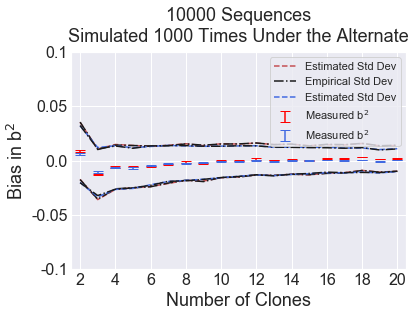

In [12]:
fig,ax = plt.subplots()


boxplot_b2_alt = []
std_est_list_alt = []
true_std_list_alt = []
stderr_list_alt = []
mean_list_alt = []
for num_clones in sorted(set(nullresult_df.Num_clones)):
    boxplot_b2_alt.append(np.array(altresult_df.Fig3EF_h21[altresult_df.Num_clones==num_clones]))
    std_est_list_alt.append(np.sqrt(np.mean(altresult_df.Fig3EF_dh21[altresult_df.Num_clones==num_clones])))
    true_std_list_alt.append(np.std(np.array(altresult_df.Fig3EF_h21[altresult_df.Num_clones==num_clones])))
    stderr_list_alt.append(st.sem(altresult_df.Fig3EF_h21[nullresult_df.Num_clones==num_clones]))
    mean_list_alt.append(np.mean(altresult_df.Fig3EF_h21[nullresult_df.Num_clones==num_clones]))
    
    
    
boxplot_var_alt = []
boxplot_var_null = []
boxplot_var_var_alt = []
boxplot_var_var_null = []
for num_clones in sorted(set(altresult_df.Num_clones)):
    boxplot_var_alt.append(np.array(altresult_df.Fig3EF_b1[altresult_df.Num_clones==num_clones]))
    boxplot_var_null.append(np.array(nullresult_df.Fig3EF_b1[nullresult_df.Num_clones==num_clones]))
    boxplot_var_var_alt.append(np.array(altresult_df.Fig3EF_db1[altresult_df.Num_clones==num_clones]))
    boxplot_var_var_null.append(np.array(nullresult_df.Fig3EF_db1[nullresult_df.Num_clones==num_clones]))

for i in range(len(boxplot_var_alt)):
    boxplot_var_alt[i] = np.mean(boxplot_var_alt[i])
    boxplot_var_null[i] = np.mean(boxplot_var_null[i])
    boxplot_var_var_alt[i] = np.mean(boxplot_var_var_alt[i])
    boxplot_var_var_null[i] = np.mean(boxplot_var_var_null[i])
boxplot_var_alt = np.array(boxplot_var_alt)
boxplot_var_null = np.array(boxplot_var_null)
boxplot_var_var_alt = np.array(boxplot_var_var_alt)
boxplot_var_var_null = np.array(boxplot_var_var_null)

def uncertainty(a,b,da,db):
    return a/b,np.sqrt((b*da)**2+(a*db)**2/b**4)

h2,dh2 = uncertainty(boxplot_var_null,boxplot_var_alt,np.sqrt(boxplot_var_var_null),np.sqrt(boxplot_var_var_alt))

for i in range(len(boxplot_b2_alt)):
    boxplot_b2_alt[i]-=h2[i]

plt.errorbar(range(2,21),np.array(mean_list_alt)-np.array(h2),yerr=stderr_list_alt,fmt = 'none',ecolor='red',label='Measured b$^2$')


mean_b2_alt = []
median_b2_alt = []
for i in range(len(boxplot_b2_alt)):
    mean_b2_alt.append(np.mean(boxplot_b2_alt[i]))
    median_b2_alt.append(np.median(boxplot_b2_alt[i]))
    
plt.plot(range(2,21),np.array(mean_b2_alt)+np.array(std_est_list_alt),'r--',alpha=1,label='Estimated Std Dev')
plt.plot(range(2,21),np.array(mean_b2_alt)-np.array(std_est_list_alt),'r--',alpha=1)

plt.plot(range(2,21),np.array(mean_b2_alt)+np.array(true_std_list_alt),'k-.',alpha=1,label='Empirical Std Dev')
plt.plot(range(2,21),np.array(mean_b2_alt)-np.array(true_std_list_alt),'k-.',alpha=1)
    
plt.legend()
ax.tick_params(direction='in')
ax.set_xticks(np.array(sorted(set(altresult_df.Num_clones)))[::skip_freq])
ax.set_xticklabels(np.array(sorted(set(altresult_df.Num_clones)))[::skip_freq])
plt.xlabel("Number of Clones")
plt.ylabel("Bias in b$^2$")
plt.title('10000 Sequences Simulated 1000 Times Under the Alternate')
plt.xlim(1.5,20.5)






boxplot_b2_alt = []
std_est_list_alt = []
true_std_list_alt = []
stderr_list_alt = []
mean_list_alt = []
for num_clones in sorted(set(nullresult_df.Num_clones)):
    boxplot_b2_alt.append(np.array(altresult_df.Fig3EF_h22[altresult_df.Num_clones==num_clones]))
    std_est_list_alt.append(np.sqrt(np.mean(altresult_df.Fig3EF_dh22[altresult_df.Num_clones==num_clones])))
    true_std_list_alt.append(np.std(np.array(altresult_df.Fig3EF_h22[altresult_df.Num_clones==num_clones])))
    stderr_list_alt.append(st.sem(altresult_df.Fig3EF_h22[nullresult_df.Num_clones==num_clones]))
    mean_list_alt.append(np.mean(altresult_df.Fig3EF_h22[nullresult_df.Num_clones==num_clones]))
    
    
    
boxplot_var_alt = []
boxplot_var_null = []
boxplot_var_var_alt = []
boxplot_var_var_null = []
for num_clones in sorted(set(altresult_df.Num_clones)):
    boxplot_var_alt.append(np.array(altresult_df.Fig3EF_b2[altresult_df.Num_clones==num_clones]))
    boxplot_var_null.append(np.array(nullresult_df.Fig3EF_b2[nullresult_df.Num_clones==num_clones]))
    boxplot_var_var_alt.append(np.array(altresult_df.Fig3EF_db2[altresult_df.Num_clones==num_clones]))
    boxplot_var_var_null.append(np.array(nullresult_df.Fig3EF_db2[nullresult_df.Num_clones==num_clones]))

for i in range(len(boxplot_var_alt)):
    boxplot_var_alt[i] = np.mean(boxplot_var_alt[i])
    boxplot_var_null[i] = np.mean(boxplot_var_null[i])
    boxplot_var_var_alt[i] = np.mean(boxplot_var_var_alt[i])
    boxplot_var_var_null[i] = np.mean(boxplot_var_var_null[i])
boxplot_var_alt = np.array(boxplot_var_alt)
boxplot_var_null = np.array(boxplot_var_null)
boxplot_var_var_alt = np.array(boxplot_var_var_alt)
boxplot_var_var_null = np.array(boxplot_var_var_null)

def uncertainty(a,b,da,db):
    return a/b,np.sqrt((b*da)**2+(a*db)**2/b**4)

h2,dh2 = uncertainty(boxplot_var_null,boxplot_var_alt,np.sqrt(boxplot_var_var_null),np.sqrt(boxplot_var_var_alt))

for i in range(len(boxplot_b2_alt)):
    boxplot_b2_alt[i]-=h2[i]

plt.errorbar(range(2,21),np.array(mean_list_alt)-np.array(h2),yerr=stderr_list_alt,fmt = 'none',ecolor='royalblue',label='Measured b$^2$')

mean_b2_alt = []
median_b2_alt = []
for i in range(len(boxplot_b2_alt)):
    mean_b2_alt.append(np.mean(boxplot_b2_alt[i]))
    median_b2_alt.append(np.median(boxplot_b2_alt[i]))
    
plt.plot(range(2,21),np.array(mean_b2_alt)+np.array(std_est_list_alt),color='royalblue',linestyle='--',alpha=1,label='Estimated Std Dev')
plt.plot(range(2,21),np.array(mean_b2_alt)-np.array(std_est_list_alt),color='royalblue',linestyle='--',alpha=1)

plt.plot(range(2,21),np.array(mean_b2_alt)+np.array(true_std_list_alt),'k-.',alpha=1)
plt.plot(range(2,21),np.array(mean_b2_alt)-np.array(true_std_list_alt),'k-.',alpha=1)
    
    
plt.legend(loc='upper right')
ax.tick_params(direction='in')
ax.set_xticks(np.array(sorted(set(altresult_df.Num_clones)))[::2])
ax.set_xticklabels(np.array(sorted(set(altresult_df.Num_clones)))[::2],fontsize=16)
ax.set_yticks([-.1,-.05,0,.05,.1])
ax.set_yticklabels([-0.10,-0.05,0.00,0.05,0.10],fontsize=16)
plt.xlabel("Number of Clones",fontsize=18)
plt.ylabel("Bias in b$^2$",fontsize=18)
plt.title('10000 Sequences\nSimulated 1000 Times Under the Alternate',fontsize=18,pad=10)
plt.xlim(1.5,20.5)
plt.ylim(-.1,.1)

plt.show()


## Fig 3B and 3C

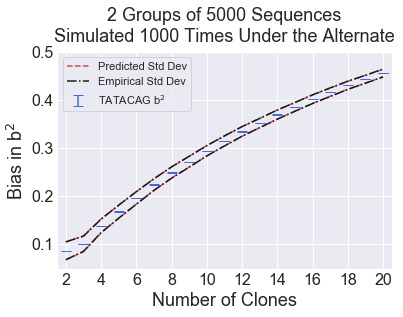

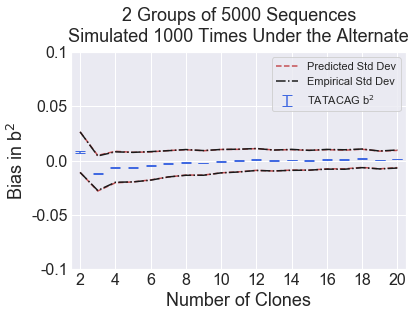

In [13]:

fig,ax = plt.subplots()


boxplot_b2_alt = []
std_est_list_alt = []
true_std_list_alt = []
stderr_list_alt = []
mean_list_alt = []
for num_clones in sorted(set(nullresult_df.Num_clones)):
    boxplot_b2_alt.append(np.array(altresult_df.Fig3BC_h2[altresult_df.Num_clones==num_clones]))
    std_est_list_alt.append(np.sqrt(np.mean(altresult_df.Fig3BC_dh2[altresult_df.Num_clones==num_clones])))
    true_std_list_alt.append(np.std(altresult_df.Fig3BC_h2[altresult_df.Num_clones==num_clones]))
    stderr_list_alt.append(st.sem(altresult_df.Fig3BC_h2[altresult_df.Num_clones==num_clones]))
    mean_list_alt.append(np.mean(altresult_df.Fig3BC_h2[altresult_df.Num_clones==num_clones]))



boxplot_b2_alt = []
std_est_list_alt = []
true_std_list_alt = []
for num_clones in sorted(set(nullresult_df.Num_clones)):
    boxplot_b2_alt.append(np.array(altresult_df.Fig3BC_h2[altresult_df.Num_clones==num_clones]))
    std_est_list_alt.append(np.sqrt(np.mean(altresult_df.Fig3BC_dh2[altresult_df.Num_clones==num_clones])))
    true_std_list_alt.append(np.std(altresult_df.Fig3BC_h2[altresult_df.Num_clones==num_clones]))

boxplot_var_alt = []
boxplot_var_null = []
boxplot_var_var_alt = []
boxplot_var_var_null = []
for num_clones in sorted(set(altresult_df.Num_clones)):
    boxplot_var_alt.append(np.array(altresult_df.Fig3BC_b[altresult_df.Num_clones==num_clones]))
    boxplot_var_null.append(np.array(nullresult_df.Fig3BC_b[nullresult_df.Num_clones==num_clones]))
    boxplot_var_var_alt.append(np.array(altresult_df.Fig3BC_db[altresult_df.Num_clones==num_clones]))
    boxplot_var_var_null.append(np.array(nullresult_df.Fig3BC_db[nullresult_df.Num_clones==num_clones]))

for i in range(len(boxplot_var_alt)):
    boxplot_var_alt[i] = np.mean(boxplot_var_alt[i])
    boxplot_var_null[i] = np.mean(boxplot_var_null[i])
    boxplot_var_var_alt[i] = np.mean(boxplot_var_var_alt[i])
    boxplot_var_var_null[i] = np.mean(boxplot_var_var_null[i])
boxplot_var_alt = np.array(boxplot_var_alt)
boxplot_var_null = np.array(boxplot_var_null)
boxplot_var_var_alt = np.array(boxplot_var_var_alt)
boxplot_var_var_null = np.array(boxplot_var_var_null)

def uncertainty(a,b,da,db):
    return a/b,np.sqrt((b*da)**2+(a*db)**2/b**4)

h2,dh2 = uncertainty(boxplot_var_null,boxplot_var_alt,np.sqrt(boxplot_var_var_null),np.sqrt(boxplot_var_var_alt))

for i in range(len(boxplot_b2_alt)):
    boxplot_b2_alt[i]-=h2[i]



plt.errorbar(range(2,21),np.array(mean_list_alt),yerr=stderr_list_alt,fmt = 'none',ecolor='royalblue',label='TATACAG b$^2$')

mean_b2_alt = []
for i in range(len(boxplot_b2_alt)):
    mean_b2_alt.append(np.mean(boxplot_b2_alt[i]))
    
plt.plot(range(2,21),np.array(mean_list_alt)+np.array(std_est_list_alt),'r--',alpha=1,label='Predicted Std Dev')
plt.plot(range(2,21),np.array(mean_list_alt)-np.array(std_est_list_alt),'r--',alpha=1)

plt.plot(range(2,21),np.array(mean_list_alt)+np.array(true_std_list_alt),'k-.',alpha=1)
plt.plot(range(2,21),np.array(mean_list_alt)-np.array(true_std_list_alt),'k-.',alpha=1,label='Empirical Std Dev')
    

plt.legend()
ax.tick_params(direction='in')
ax.set_xticks(np.array(sorted(set(altresult_df.Num_clones)))[::2])
ax.set_xticklabels(np.array(sorted(set(altresult_df.Num_clones)))[::2],fontsize=16)
ax.set_yticks([.1,.2,.3,.4,.5])
ax.set_yticklabels([.1,.2,.3,.4,.5],fontsize=16)

plt.xlabel("Number of Clones",fontsize=18)
plt.ylabel("Bias in b$^2$",fontsize=18)
plt.title('2 Groups of 5000 Sequences\nSimulated 1000 Times Under the Alternate',fontsize=18,pad=10)

plt.xlim(1.5,20.5)

plt.legend()

plt.show()



















fig,ax = plt.subplots()



plt.errorbar(range(2,21),np.array(mean_list_alt)-np.array(h2),yerr=stderr_list_alt,fmt = 'none',ecolor='royalblue',label='TATACAG b$^2$')

mean_b2_alt = []
for i in range(len(boxplot_b2_alt)):
    mean_b2_alt.append(np.mean(boxplot_b2_alt[i]))
    
plt.plot(range(2,21),np.array(mean_b2_alt)+np.array(std_est_list_alt),'r--',alpha=1,label='Predicted Std Dev')
plt.plot(range(2,21),np.array(mean_b2_alt)-np.array(std_est_list_alt),'r--',alpha=1)

plt.plot(range(2,21),np.array(mean_b2_alt)+np.array(true_std_list_alt),'k-.',alpha=1)
plt.plot(range(2,21),np.array(mean_b2_alt)-np.array(true_std_list_alt),'k-.',alpha=1,label='Empirical Std Dev')
    

plt.legend()
ax.tick_params(direction='in')
ax.set_xticks(np.array(sorted(set(altresult_df.Num_clones)))[::2])
ax.set_xticklabels(np.array(sorted(set(altresult_df.Num_clones)))[::2],fontsize=16)
ax.set_yticks([-.1,-.05,0,.05,.1])
ax.set_yticklabels([-.1,-0.05,0.00,0.05,.1],fontsize=16)
plt.xlabel("Number of Clones",fontsize=18)
plt.ylabel("Bias in b$^2$",fontsize=18)
plt.title('2 Groups of 5000 Sequences\nSimulated 1000 Times Under the Alternate',fontsize=18,pad=10)

plt.xlim(1.5,20.5)
plt.ylim(-.1,.1)

plt.legend()

plt.show()



## Fig 4B and 4C

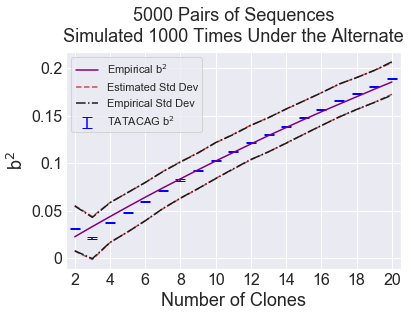

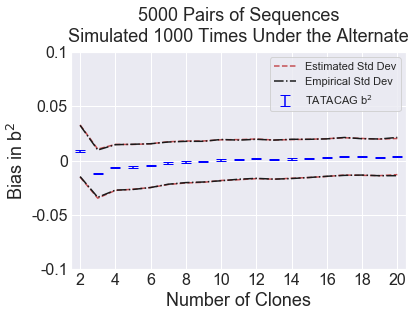

In [14]:
fig,ax = plt.subplots()


boxplot_b2_alt = []
std_est_list_alt = []
true_std_list_alt = []
stderr_list_alt = []
mean_list_alt = []
for num_clones in sorted(set(nullresult_df.Num_clones)):
    boxplot_b2_alt.append(np.array(altresult_df.Fig4BC_h2[altresult_df.Num_clones==num_clones]))
    std_est_list_alt.append(np.sqrt(np.mean(altresult_df.Fig4BC_dh2[altresult_df.Num_clones==num_clones])))
    true_std_list_alt.append(np.std(altresult_df.Fig4BC_h2[altresult_df.Num_clones==num_clones]))
    stderr_list_alt.append(st.sem(altresult_df.Fig4BC_h2[altresult_df.Num_clones==num_clones]))
    mean_list_alt.append(np.mean(altresult_df.Fig4BC_h2[altresult_df.Num_clones==num_clones]))

boxplot_var_alt = []
boxplot_var_null = []
boxplot_var_var_alt = []
boxplot_var_var_null = []
for num_clones in sorted(set(altresult_df.Num_clones)):
    boxplot_var_alt.append(np.array(altresult_df.Fig4BC_b[altresult_df.Num_clones==num_clones]))
    boxplot_var_null.append(np.array(nullresult_df.Fig4BC_b[nullresult_df.Num_clones==num_clones]))
    boxplot_var_var_alt.append(np.array(altresult_df.Fig4BC_db[altresult_df.Num_clones==num_clones]))
    boxplot_var_var_null.append(np.array(nullresult_df.Fig4BC_db[nullresult_df.Num_clones==num_clones]))

for i in range(len(boxplot_var_alt)):
    boxplot_var_alt[i] = np.mean(boxplot_var_alt[i])
    boxplot_var_null[i] = np.mean(boxplot_var_null[i])
    boxplot_var_var_alt[i] = np.mean(boxplot_var_var_alt[i])
    boxplot_var_var_null[i] = np.mean(boxplot_var_var_null[i])
boxplot_var_alt = np.array(boxplot_var_alt)
boxplot_var_null = np.array(boxplot_var_null)
boxplot_var_var_alt = np.array(boxplot_var_var_alt)
boxplot_var_var_null = np.array(boxplot_var_var_null)

def uncertainty(a,b,da,db):
    return a/b,np.sqrt((b*da)**2+(a*db)**2/b**4)

h2,dh2 = uncertainty(boxplot_var_null,boxplot_var_alt,np.sqrt(boxplot_var_var_null),np.sqrt(boxplot_var_var_alt))

for i in range(len(boxplot_b2_alt)):
    boxplot_b2_alt[i]-=h2[i]

    
    
    
plt.errorbar(range(2,21),np.array(mean_list_alt),yerr=stderr_list_alt,fmt = 'none',ecolor='blue',label='TATACAG b$^2$')

mean_b2_alt = []
for i in range(len(boxplot_b2_alt)):
    mean_b2_alt.append(np.mean(boxplot_b2_alt[i]))
    
plt.plot(range(2,21),h2,'purple',alpha=1,label='Empirical b$^2$')    
    
plt.plot(range(2,21),np.array(mean_list_alt)+np.array(std_est_list_alt),'r--',alpha=1,label='Estimated Std Dev')
plt.plot(range(2,21),np.array(mean_list_alt)-np.array(std_est_list_alt),'r--',alpha=1)

plt.plot(range(2,21),np.array(mean_list_alt)+np.array(true_std_list_alt),'k-.',alpha=1)
plt.plot(range(2,21),np.array(mean_list_alt)-np.array(true_std_list_alt),'k-.',alpha=1,label='Empirical Std Dev')
    

plt.legend()
ax.tick_params(direction='in')
ax.set_xticks(np.array(sorted(set(altresult_df.Num_clones)))[::2])
ax.set_xticklabels(np.array(sorted(set(altresult_df.Num_clones)))[::2],fontsize=16)
ax.set_yticks([0,.05,.1,.15,.2])
ax.set_yticklabels([0,.05,.1,.15,.2],fontsize=16)
plt.xlabel("Number of Clones",fontsize=18)
plt.ylabel("b$^2$",fontsize=18)
plt.title('5000 Pairs of Sequences\nSimulated 1000 Times Under the Alternate',fontsize=18,pad=10)

plt.xlim(1.5,20.5)


plt.show()


    
    
    
    

fig,ax = plt.subplots()

    
plt.errorbar(range(2,21),np.array(mean_list_alt)-np.array(h2),yerr=stderr_list_alt,fmt = 'none',ecolor='blue',label='TATACAG b$^2$')


mean_b2_alt = []
for i in range(len(boxplot_b2_alt)):
    mean_b2_alt.append(np.mean(boxplot_b2_alt[i]))
    
plt.plot(range(2,21),np.array(mean_b2_alt)+np.array(std_est_list_alt),'r--',alpha=1,label='Estimated Std Dev')
plt.plot(range(2,21),np.array(mean_b2_alt)-np.array(std_est_list_alt),'r--',alpha=1)

plt.plot(range(2,21),np.array(mean_b2_alt)+np.array(true_std_list_alt),'k-.',alpha=1)
plt.plot(range(2,21),np.array(mean_b2_alt)-np.array(true_std_list_alt),'k-.',alpha=1,label='Empirical Std Dev')
    

plt.legend()
ax.tick_params(direction='in')
ax.set_xticks(np.array(sorted(set(altresult_df.Num_clones)))[::2])
ax.set_xticklabels(np.array(sorted(set(altresult_df.Num_clones)))[::2],fontsize=16)
ax.set_yticks([-.1,-.05,0,.05,.1])
ax.set_yticklabels([-.1,-.05,0,.05,.1],fontsize=16)
plt.xlabel("Number of Clones",fontsize=18)
plt.ylabel("Bias in b$^2$",fontsize=18)
plt.title('5000 Pairs of Sequences\nSimulated 1000 Times Under the Alternate',fontsize=18,pad=10)

plt.xlim(1.5,20.5)
plt.ylim(-.1,.1)

plt.show()

